In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
Results = pd.read_csv('results.csv')


In [3]:
Results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
Results2021 = Results[Results["raceId"] >= 1052]

In [5]:
Results2021.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44,2,1,1,1,25.0,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1
24961,24967,1052,830,9,33,1,2,2,2,18.0,56,+0.745,5524642,41,2,1:33.228,208.984,1
24962,24968,1052,822,131,77,3,3,3,3,16.0,56,+37.383,5561280,56,1,1:32.090,211.566,1
24963,24969,1052,846,1,4,7,4,4,4,12.0,56,+46.466,5570363,38,6,1:34.396,206.398,1
24964,24970,1052,815,9,11,0,5,5,5,10.0,56,+52.047,5575944,44,3,1:33.970,207.334,1


In [6]:
qualifying_avg = Results2021.groupby(["driverId"]).mean()["grid"]
qualifying_avg

driverId
1       3.272727
4      10.727273
8      13.263158
9      16.500000
20     11.238095
807    17.000000
815     4.090909
817     9.863636
822     5.590909
825     7.000000
830     2.636364
832     7.818182
839    10.772727
840    13.409091
841    12.571429
842     6.727273
844     5.909091
846     7.272727
847    12.727273
848    14.000000
849    15.363636
852    11.863636
853    18.428571
854    17.227273
855    15.000000
Name: grid, dtype: float64

In [7]:
result_avg = Results2021.groupby(["driverId"]).mean()["positionOrder"]
result_avg

driverId
1       3.500000
4      10.181818
8      13.157895
9      14.500000
20     12.142857
807    17.000000
815     8.181818
817     8.681818
822     6.772727
825     5.000000
830     4.909091
832     6.272727
839    10.681818
840    12.227273
841    13.000000
842     9.772727
844     7.409091
846     7.272727
847    13.318182
848    13.000000
849    15.409091
852    12.954545
853    17.857143
854    16.681818
855    10.000000
Name: positionOrder, dtype: float64

In [8]:
constructor_qual_avg = Results2021.groupby(["constructorId"]).mean()["grid"]
constructor_qual_avg

constructorId
1       8.568182
3      14.159091
6       6.863636
9       3.363636
51     12.954545
117    12.454545
131     4.500000
210    17.568182
213     9.295455
214    10.750000
Name: grid, dtype: float64

In [9]:
constructor_result_avg = Results2021.groupby(["constructorId"]).mean()["positionOrder"]
constructor_result_avg

constructorId
1       7.977273
3      14.568182
6       6.840909
9       6.545455
51     12.909091
117    12.295455
131     5.090909
210    16.977273
213    11.363636
214    10.431818
Name: positionOrder, dtype: float64

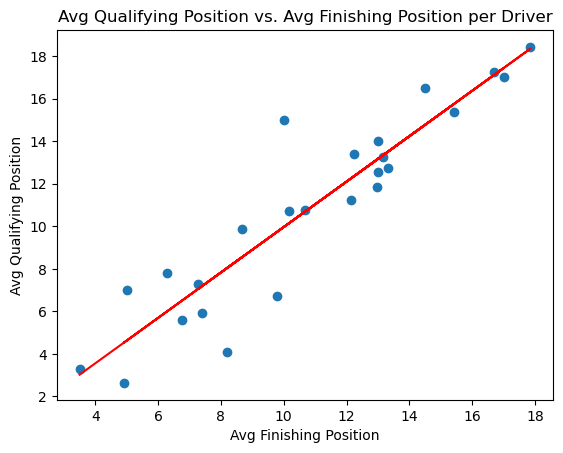

The r-value is: 0.8522024280231836


In [38]:
y = qualifying_avg
x = result_avg
(slope, intercept, rvalue, pvalue, stderr) = sp.linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.title('Avg Qualifying Position vs. Avg Finishing Position per Driver')
plt.xlabel("Avg Finishing Position")
plt.ylabel('Avg Qualifying Position')
plt.show()
print(f"The r-value is: {rvalue**2}")

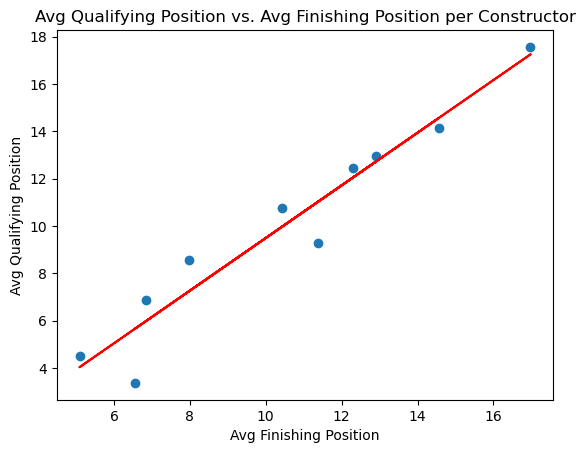

The r-value is: 0.9319303898351609


In [37]:
y = constructor_qual_avg
x = constructor_result_avg

(slope, intercept, rvalue, pvalue, stderr) = sp.linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y) #color=["#00FFFF", "#00008B", "#FF3030", "#EE7600", "#2F4F4F", "#CAFF70", "#98F5FF", "#FF6103", "#9932CC", "#006400"])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.title('Avg Qualifying Position vs. Avg Finishing Position per Constructor')
plt.xlabel("Avg Finishing Position")
plt.ylabel('Avg Qualifying Position')
plt.show()
print(f"The r-value is: {rvalue**2}")